In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymysql
from fbprophet import Prophet

In [84]:
# get data
db_connection = pymysql.connect(host='13.251.234.97', user='bi_all', passwd='vela.12345', db='python_prj')
#vn_index
df = pd.read_sql("""select * from INDEX_data""", con=db_connection)

In [85]:
frames = [df[df['<Ticker>']== 'VNINDEX']]
df = pd.concat(frames)

In [30]:
# df.set_index('<DTYYYYMMDD>',inplace=True)

In [31]:
# df.drop(['index', '<Ticker>'], inplace=True, axis = 1)

In [86]:
df.drop(['index', '<Ticker>','<Open>','<High>','<Low>','<Volume>'], inplace=True, axis = 1)

In [87]:
df['<DTYYYYMMDD>'] = pd.to_datetime(df['<DTYYYYMMDD>'].astype(str), format = '%Y%m%d')

In [88]:
model = Prophet()

In [105]:
df.columns = ['ds', 'y']

In [ ]:
model.fit(df)

In [113]:
future_stock_data = model.make_future_dataframe(periods=2000, freq = 'd')

In [114]:
forecast_data = model.predict(future_stock_data)

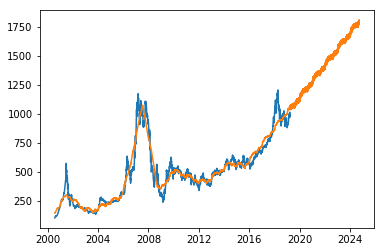

In [115]:
plt.plot(df.ds,df.y)
plt.plot(forecast_data.ds,forecast_data.yhat)

In [1]:
# print ("Forecast data")
# print (forecast_data[['ds','yhat']][::-1])

In [2]:
# df

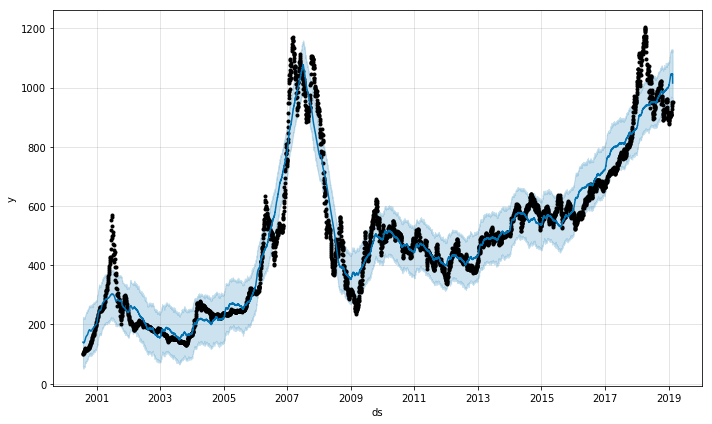

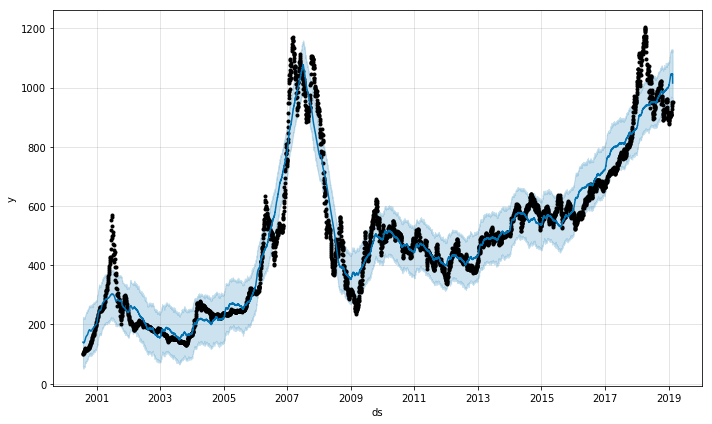

In [69]:
model.plot(forecast_data)
# model.plot_components(forecast_data)

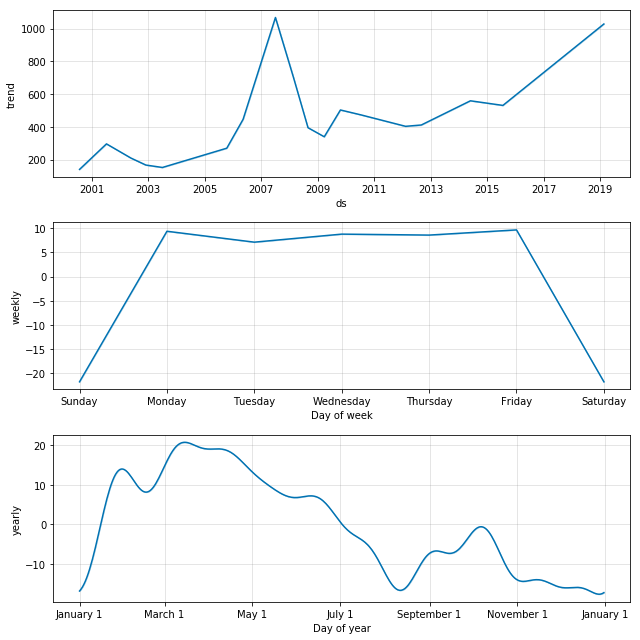

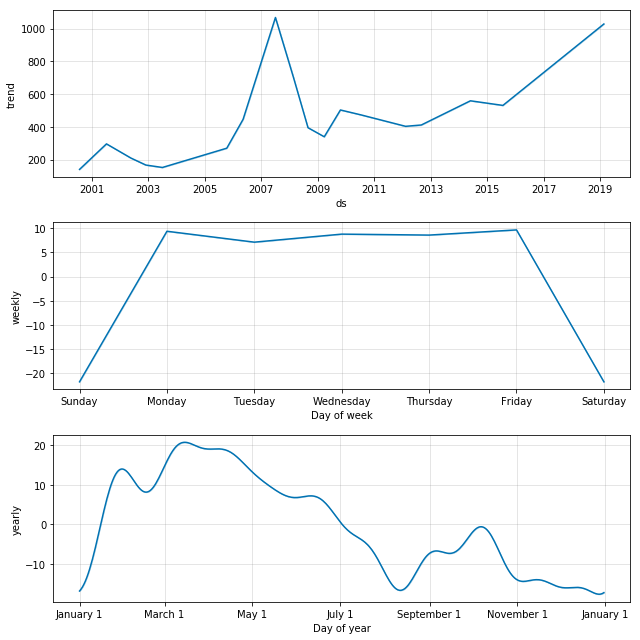

In [43]:
model.plot_components(forecast_data)

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [81]:
decomp = seasonal_decompose(train.y, freq = 1)

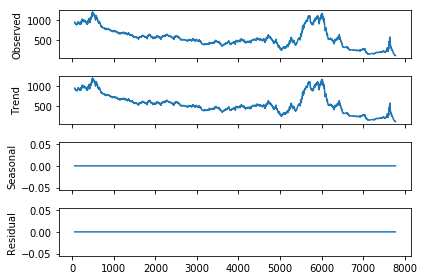

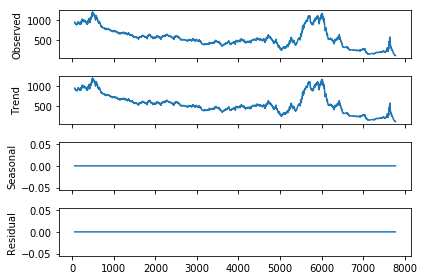

In [82]:
decomp.plot()

In [19]:
?seasonal_decompose

Signature: seasonal_decompose(x, model='additive', filt=None, freq=None, two_sided=True, extrapolate_trend=0)
Docstring:
Seasonal decomposition using moving averages

Parameters
----------
x : array-like
    Time series. If 2d, individual series are in columns.
model : str {"additive", "multiplicative"}
    Type of seasonal component. Abbreviations are accepted.
filt : array-like
    The filter coefficients for filtering out the seasonal component.
    The concrete moving average method used in filtering is determined by two_sided.
freq : int, optional
    Frequency of the series. Must be used if x is not a pandas object.
    Overrides default periodicity of x if x is a pandas
    object with a timeseries index.
two_sided : bool
    The moving average method used in filtering.
    If True (default), a centered moving average is computed using the filt.
    If False, the filter coefficients are for past values only.
extrapolate_trend : int or 'freq', optional
    If set to > 0, the tren